##NETWORK ANAMOLY DETECTION

BUSINESS CONTEXT:
With the enormous growth of computer networks usage and the huge increase in the number of Applications running on top of it, network security is becoming increasingly more important. All The computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is Becoming more important. The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research
anomaly detection is typically conceived as a more powerful method due to its theoretical
potential for addressing novel attacks. Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% ,While keeping the false alarm rate at 1%. However, when we look at the state of the art IDS Solutions and commercial tools, there is no evidence of using anomaly detection approaches, and Practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

BUSINESS PROBLEM:
Your task to build network intrusion detection system to detect anomalies and attacks in the
Network. There are two problems.

Binomial Classification: Activity is normal or attack
Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R
Please note that, currently the dependent variable (target variable) is not defined explicitly.
However, you can use attack variable to define the target variable as required.

ATTACK CLASS:

DOS: Denial of service is an attack category, which depletes the victim’s resources thereby making it
Unable to handle legitimate requests – e.g. syn flooding. Relevant features: “source bytes” and “percentage
Of packets with errors”
Probing: Surveillance and other probing attack’s objective is to gain information about the remote victim
e.g. port scanning. Relevant features: “duration of connection” and “source bytes”
U2R: unauthorized access to local super user (root) privileges is an attack type, by which an attacker uses
a normal account to login into a victim system and tries to gain root/administrator privileges by exploiting
Some vulnerability in the victim e.g. buffer overflow attacks. Relevant features: “number of file creations”
and “number of shell prompts invoked,”
R2L: unauthorized access from a remote machine, the attacker intrudes into a remote machine and gains
Local access of the victim machine. E.g. password guessing relevant features: Network level features –
“Duration of connection” and “service requested” and host level features - “number of failed login
Attempts”

#Import Data and Required Packages:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from scipy import stats
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

#Import the CSV Data as Pandas DataFrame:

In [26]:
df = pd.read_csv("/content/Network_anomaly_data.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


#Data Checks to perform:
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

In [27]:
df.shape

(125973, 43)

In [28]:
df.isna().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
land,0
wrongfragment,0
urgent,0
hot,0


There are no missing values in the data set

In [29]:
df.duplicated().sum()

0

There are no missing values in the data set

In [30]:
df.nunique()

,0
duration,2981
protocoltype,3
service,70
flag,11
srcbytes,3341
dstbytes,9326
land,2
wrongfragment,3
urgent,4
hot,28


In [31]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [32]:
print('Information of Data','\n')
print(df.info(),'\n')

Information of Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14

After going through description
* Merge src and dsy bytes into single Total bytes.
* Remove 'land','urgent','numfailedlogins','numoutboundcmds' have mostly zero values so we can drop these columns.

In [33]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [34]:
print("Categories in 'protocoltype' variable:     ",end=" " )
print(df['protocoltype'].unique())



print("Categories in 'service' variable:  ",end=" ")
print(df['service'].unique())



print("Categories in'flag' variable:",end=" " )
print(df['flag'].unique())



print("Categories in 'attack' variable:     ",end=" " )
print(df['attack'].unique())



Categories in 'protocoltype' variable:      ['tcp' 'udp' 'icmp']
Categories in 'service' variable:   ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Categories in'flag' variable: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Categories in 'attack' variable:      ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 '

In [35]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 39 numerical features : ['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag']

We have 4 categorical features : ['protocoltype', 'service', 'flag', 'attack']


In [36]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [37]:
# 1. Connection Risk Score
# Assuming "Dst_bytes" and "Src_bytes" are relevant for determining risk score
df['connectionriskscore'] = df['dstbytes'] + df['srcbytes']

# 2. High Data Transfer Alert
# Flag connections with high transfer volumes, assuming 'threshold' is a significant threshold value
threshold = 10000  # You can adjust this threshold based on data distribution
df['highdatatransferalert'] = np.where((df['srcbytes'] + df['dstbytes']) > threshold, 1, 0)

# 3. Access Anomaly Score
# Weight factors: Compromised, Failed Logins, Su Attempted, Root Access
df['accessanomalyscore'] = (
    2 * df['numcompromised'] +
    1.5 * df['numfailedlogins'] +
    3 * df['suattempted'] +
    5 * df['rootshell']
)

# 4. Frequent Host Connection Score
# A scoring based on Dst_host_count and Dst_host_srv_count (normalized if necessary)
df['frequenthostconnectionscore'] = df['dsthostcount'] + 0.5 * df['dsthostsrvcount']

# 5. Critical Error Rate
# Derived from Serror_rate and Rerror_rate, combining these factors as an indication of critical errors
df['criticalerrorrate'] = (df['serrorrate'] + df['rerrorrate']) / 2

# 6. Attack Type Indicator
# Assign numeric categories for different attack types
df['attacktypeindicator'] = df['attack'].factorize()[0]  # Assigns unique integer for each attack type

# 7. High Error Flags
# Flag connections with high error rates or REJ status, focusing on serror and rerror rates
df['higherrorflags'] = np.where((df['serrorrate'] > 0.3) | (df['rerrorrate'] > 0.3), 1, 0)

# 8. Host Anomaly Indicator
# Indicator of unusual activity across a host based on `Dst_host_diff_srv_rate` and `Dst_host_srv_diff_host_rate`
df['hostanomalyindicator'] = np.where(
    (df['dsthostdiffsrvrate'] > 0.4) | (df['dsthostsrvdiffhostrate'] > 0.4), 1, 0
)

# 9. Login Failure Rate
# Calculate rate as ratio of failed logins to total connections
df['loginfailurerate'] = df['numfailedlogins'] / (df['numfailedlogins'] + df['loggedin'])

In [38]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,lastflag,connectionriskscore,highdatatransferalert,accessanomalyscore,frequenthostconnectionscore,criticalerrorrate,attacktypeindicator,higherrorflags,hostanomalyindicator,loginfailurerate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,20,491,0,0.0,162.5,0.0,0,0,0,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,15,146,0,0.0,255.5,0.0,0,0,1,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,19,0,0,0.0,268.0,0.5,1,1,0,NaN
3,0,tcp,http,SF,232,8153,0,0,0,0,...,21,8385,0,0.0,157.5,0.1,0,0,0,0.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,21,619,0,0.0,382.5,0.0,0,0,0,0.0


In [39]:
df.shape

(125973, 52)

In [ ]:
df.drop(columns=['srcbytes','dstbytes','land','urgent','numfailedlogins','numoutboundcmds','wrongfragment','numoutboundcmds'],axis=1,inplace=True)

The columns are used in feature Engineering or average value is zero is droped

In [41]:
df.shape

(125973, 45)

In [42]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,125963,125964,125965,125966,125967,125968,125969,125970,125971,125972
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
protocoltype,tcp,udp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,udp,tcp,tcp,tcp
service,ftp_data,other,private,http,http,private,private,private,remote_job,private,...,http,private,smtp,private,http,private,private,smtp,klogin,ftp_data
flag,SF,SF,S0,SF,SF,REJ,S0,S0,S0,S0,...,SF,S0,SF,S0,SF,S0,SF,SF,S0,SF
hot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loggedin,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
numcompromised,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rootshell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suattempted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
numroot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


##Hypothisis Testing:

In [44]:
df.head()

,duration,protocoltype,service,flag,hot,loggedin,numcompromised,rootshell,suattempted,numroot,...,lastflag,connectionriskscore,highdatatransferalert,accessanomalyscore,frequenthostconnectionscore,criticalerrorrate,attacktypeindicator,higherrorflags,hostanomalyindicator,loginfailurerate
0,0,tcp,ftp_data,SF,0,0,0,0,0,0,...,20,491,0,0.0,162.5,0.0,0,0,0,NaN
1,0,udp,other,SF,0,0,0,0,0,0,...,15,146,0,0.0,255.5,0.0,0,0,1,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,19,0,0,0.0,268.0,0.5,1,1,0,NaN
3,0,tcp,http,SF,0,1,0,0,0,0,...,21,8385,0,0.0,157.5,0.1,0,0,0,0.0
4,0,tcp,http,SF,0,1,0,0,0,0,...,21,619,0,0.0,382.5,0.0,0,0,0,0.0


Hypothesis Question : Do connections with high Login Failure Rate correlate with a higher Connection Risk Score?
Null Hypothesis (H₀): There is no significant difference in Connection Risk Score between connections with high and low Login Failure Rate.

Alternative Hypothesis (H₁): Connections with a high Login Failure Rate have a significantly higher Connection Risk Score.

Test: Independent Samples T-Test

Significance Level: 0.05

In [46]:
# Assuming data is loaded in a DataFrame called df
high_failure = df[df['loginfailurerate'] > df['loginfailurerate'].median()]['connectionriskscore']
low_failure = df[df['loginfailurerate'] <= df['loginfailurerate'].median()]['connectionriskscore']

# T-Test
t_stat, p_value = stats.ttest_ind(high_failure, low_failure)

# Significance level
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis: High login failure rate is associated with higher connection risk score."
else:
    result = "Fail to reject the null hypothesis: No significant difference in connection risk score based on login failure rate."

result, p_value

('Fail to reject the null hypothesis: No significant difference in connection risk score based on login failure rate.',
 0.671366444516106)

Key Insight: A significant p-value (p < 0.05) would suggest that connections with a high login failure rate also tend to have a higher connection risk score, which could be used to flag suspicious activity.


Hypothesis Question : Does the High Data Transfer Alert frequency vary significantly by Protocol_type?
Null Hypothesis (H₀): The mean High Data Transfer Alert count is the same across all Protocol_type categories.

Alternative Hypothesis (H₁): There is a significant difference in the mean High Data Transfer Alert count across different Protocol_type categories.

Test: One-Way ANOVA

Significance Level: 0.05

In [48]:
# Group data by Protocol_type and extract High Data Transfer Alert counts
protocol_groups = [group['highdatatransferalert'].dropna() for name, group in df.groupby('protocoltype')]

# ANOVA test
f_stat, p_value = stats.f_oneway(*protocol_groups)

# Significance level
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis: High Data Transfer Alert counts differ significantly by protocol."
else:
    result = "Fail to reject the null hypothesis: No significant difference in alert counts by protocol."

result, p_value

('Reject the null hypothesis: High Data Transfer Alert counts differ significantly by protocol.',
 0.0)

Key Insight: If the p-value is below 0.05, it indicates that certain protocols are associated with more high data transfer alerts, which could reveal protocols at higher risk for data exfiltration.

Hypothesis Question : Is there an association between Attack Type and Access Anomaly Score?
Null Hypothesis (H₀): There is no association between Attack Type and Access Anomaly Score.

Alternative Hypothesis (H₁): There is a significant association between Attack Type and Access Anomaly Score.

Test: Chi-Square Test of Independence

Significance Level: 0.05

In [50]:
# Cross-tabulate Attack Type and Access Anomaly Score
contingency_table = pd.crosstab(df['attack'], df['accessanomalyscore'] > 0)

# Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Significance level
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis: There is an association between attack type and access anomaly score."
else:
    result = "Fail to reject the null hypothesis: No significant association between attack type and access anomaly score."

result, p_value


('Reject the null hypothesis: There is an association between attack type and access anomaly score.',
 0.0)

Key Insight: A significant association (p < 0.05) would indicate that certain attack types are more likely to involve access anomalies, which could be used to detect suspicious patterns.



Hypothesis Question : Are connections with a Root Shell status associated with higher Critical Error Rates?
Null Hypothesis (H₀): Connections with Root Shell status do not have significantly higher Critical Error Rates.

Alternative Hypothesis (H₁): Connections with Root Shell status have significantly higher Critical Error Rates.

Test: Mann-Whitney U Test (non-parametric test for two independent groups)

Significance Level: 0.05

In [51]:
# Separate Critical Error Rate based on Root Shell status
root_shell = df[df['rootshell'] == 1]['criticalerrorrate']
no_root_shell = df[df['rootshell'] == 0]['criticalerrorrate']

# Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(root_shell, no_root_shell, alternative='greater')

# Significance level
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis: Connections with root shell status have significantly higher critical error rates."
else:
    result = "Fail to reject the null hypothesis: No significant difference in critical error rates based on root shell status."

result, p_value


('Fail to reject the null hypothesis: No significant difference in critical error rates based on root shell status.',
 0.9999999999999996)

Key Insight: A significant result would suggest that root shell connections are riskier, as they correspond to higher error rates, warranting immediate attention.

 Hypothesis Question : Do connections with high Frequent Host Connection Score also have higher Serror_rate?
Null Hypothesis (H₀): There is no significant correlation between Frequent Host Connection Score and Serror_rate.

Alternative Hypothesis (H₁): There is a significant positive correlation between Frequent Host Connection Score and Serror_rate.

Test: Spearman’s Rank Correlation

Significance Level: 0.05

In [52]:
# Spearman's correlation between Frequent Host Connection Score and Serror_rate
correlation, p_value = stats.spearmanr(df['frequenthostconnectionscore'], df['serrorrate'])

# Significance level
alpha = 0.05
if p_value < alpha:
    result = f"Reject the null hypothesis: Significant correlation exists with a correlation coefficient of {correlation:.2f}."
else:
    result = "Fail to reject the null hypothesis: No significant correlation."

result, correlation, p_value


('Reject the null hypothesis: Significant correlation exists with a correlation coefficient of 0.10.',
 0.09933320158402258,
 1.2799256643744838e-273)

Key Insight: A significant positive correlation indicates that as the frequent host connection score rises, so does the serror rate, which may indicate abnormal activity on frequently accessed hosts.

##Data Model and Training

In [53]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

<Axes: >

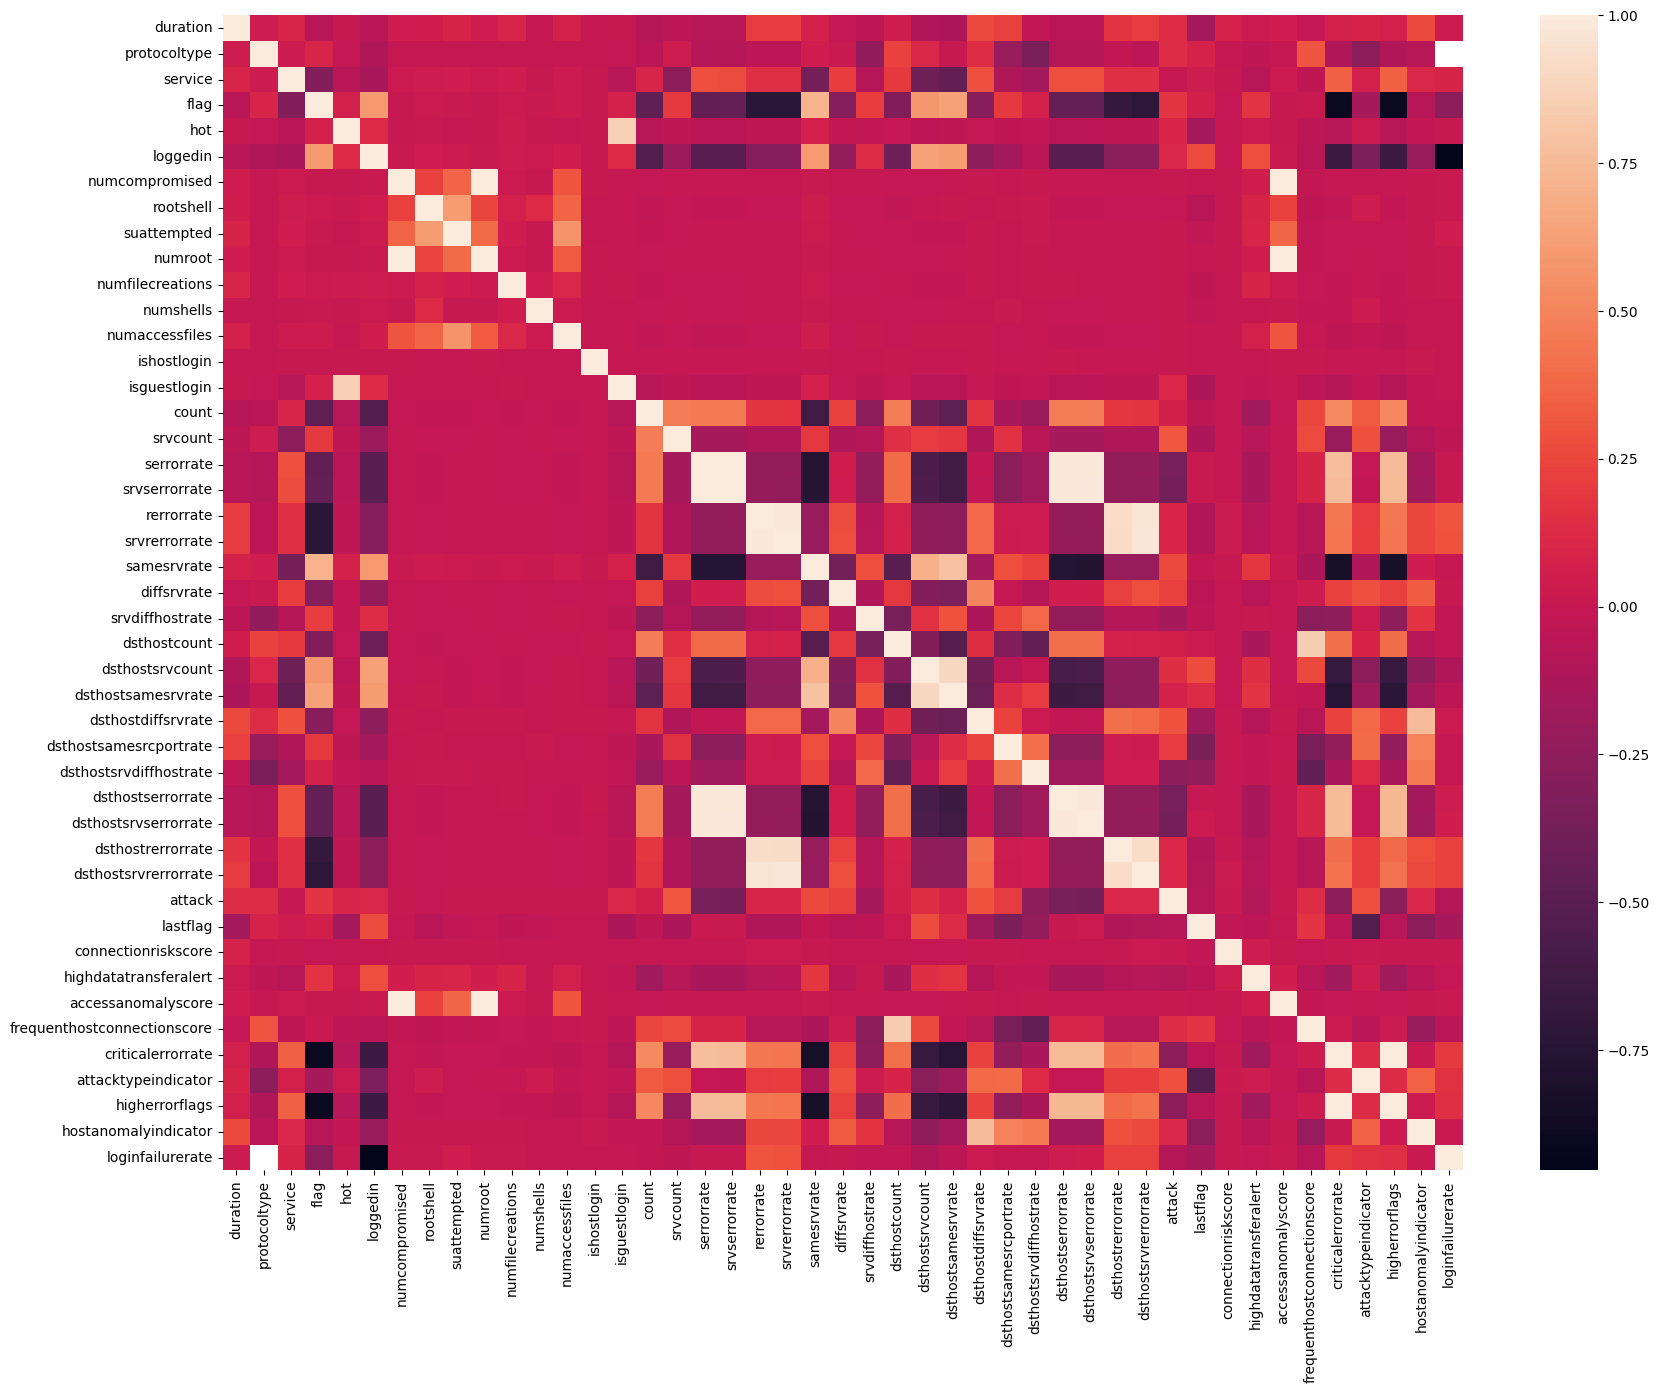

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# ... (your existing code to load and prepare 'df')

# Separate features and target
X = df.drop(['attack'], axis=1)
y = df['attack']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Fit and transform the data to replace NaNs

# Standardize features
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((100778, 44), (25195, 44))

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(true, predicted):
    # Use sklearn's accuracy_score function, not a local variable
    acc_score = accuracy_score(true,predicted)
    # Set average='weighted' for multiclass classification
    f1 = f1_score(true,predicted, average='weighted')
    prec_score = precision_score(true,predicted, average='weighted')
    rec_score = recall_score(true,predicted, average='weighted')
    return acc_score, f1, prec_score, rec_score

    #mae = mean_absolute_error(true, predicted)
    #mse = mean_squared_error(true, predicted)
    #rmse = np.sqrt(mean_squared_error(true, predicted))
    #r2_square = r2_score(true, predicted)
    #return mae, rmse, r2_square

LogisticRegression
Model performance for Training set
- Accuracy Score: 0.9996
- F1 Score: 0.9996
- Precision Score: 0.9996
- Recall Score: 0.9996
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9988
- F1 Score: 0.9989
- Precision Score: 0.9990
- Recall Score: 0.9988


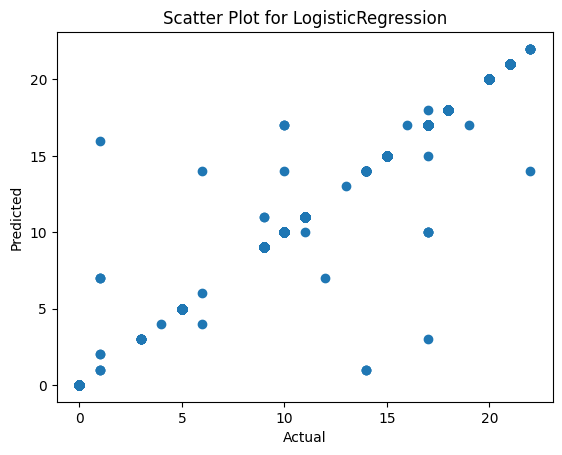



SVC
Model performance for Training set
- Accuracy Score: 0.9997
- F1 Score: 0.9997
- Precision Score: 0.9997
- Recall Score: 0.9997
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9990
- F1 Score: 0.9991
- Precision Score: 0.9992
- Recall Score: 0.9990


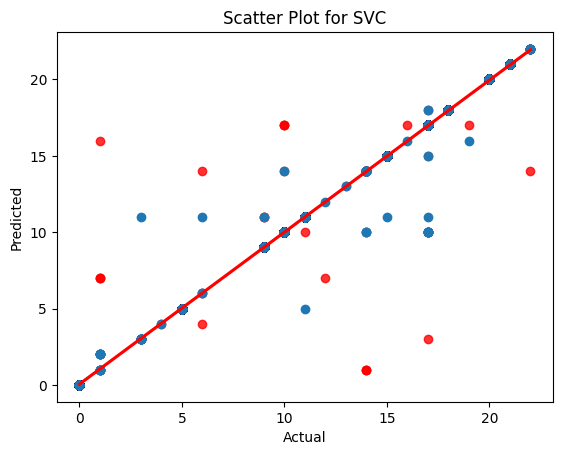



KNeighborsClassifier
Model performance for Training set
- Accuracy Score: 0.9991
- F1 Score: 0.9991
- Precision Score: 0.9991
- Recall Score: 0.9991
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9988
- F1 Score: 0.9988
- Precision Score: 0.9988
- Recall Score: 0.9988


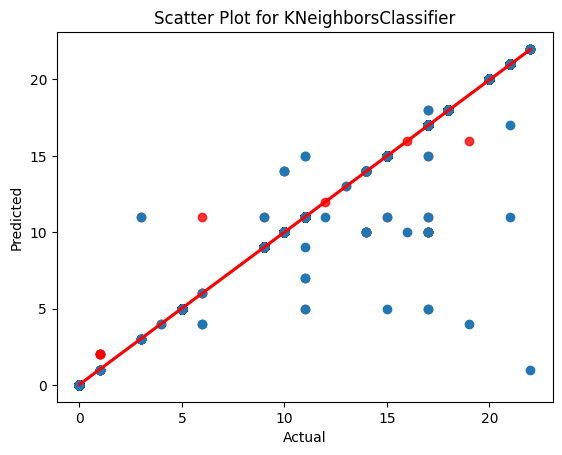



DecisionTreeClassifier
Model performance for Training set
- Accuracy Score: 1.0000
- F1 Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9999
- F1 Score: 0.9999
- Precision Score: 0.9999
- Recall Score: 0.9999


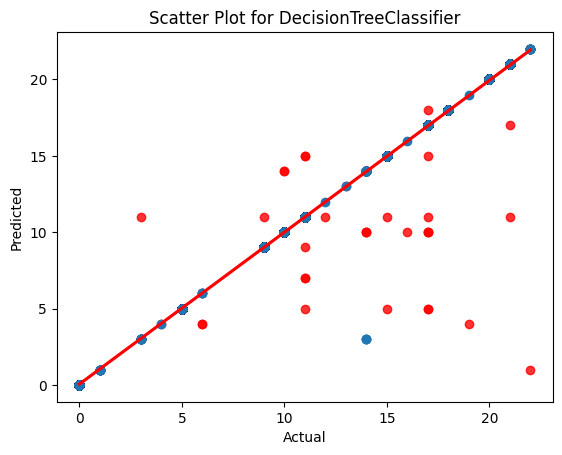



RandomForestClassifier
Model performance for Training set
- Accuracy Score: 1.0000
- F1 Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9994
- F1 Score: 0.9995
- Precision Score: 0.9996
- Recall Score: 0.9994


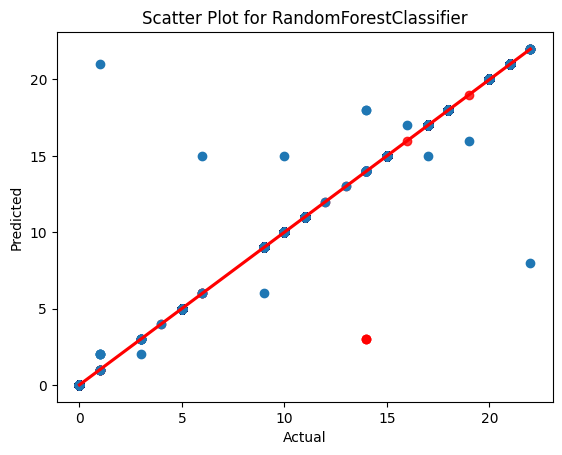



AdaBoostClassifier
Model performance for Training set
- Accuracy Score: 0.8624
- F1 Score: 0.8055
- Precision Score: 0.7655
- Recall Score: 0.8624
----------------------------------
Model performance for Test set
- Accuracy Score: 0.8594
- F1 Score: 0.8015
- Precision Score: 0.7611
- Recall Score: 0.8594


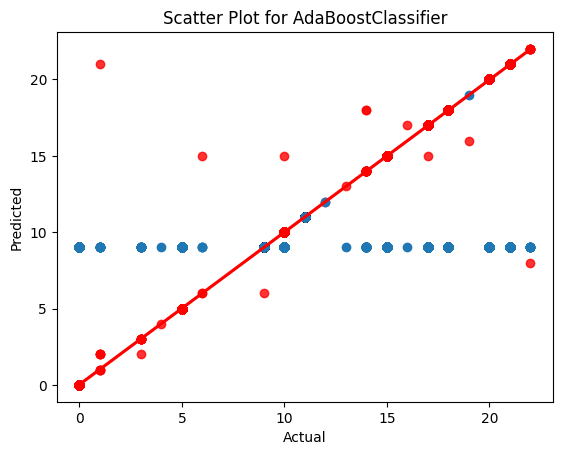



Learning rate set to 0.100114
0:	learn: 1.2731267	total: 1.18s	remaining: 19m 41s
1:	learn: 1.0282346	total: 2.22s	remaining: 18m 29s
2:	learn: 0.8649119	total: 3.26s	remaining: 18m 4s
3:	learn: 0.7397566	total: 4.3s	remaining: 17m 50s
4:	learn: 0.6391981	total: 5.33s	remaining: 17m 39s
5:	learn: 0.5573817	total: 6.36s	remaining: 17m 32s
6:	learn: 0.4885707	total: 7.4s	remaining: 17m 29s
7:	learn: 0.4307516	total: 8.44s	remaining: 17m 26s
8:	learn: 0.3813095	total: 9.52s	remaining: 17m 28s
9:	learn: 0.3382561	total: 10.9s	remaining: 17m 58s
10:	learn: 0.3018818	total: 12.7s	remaining: 18m 57s
11:	learn: 0.2697249	total: 14.5s	remaining: 19m 50s
12:	learn: 0.2413971	total: 15.5s	remaining: 19m 35s
13:	learn: 0.2164659	total: 16.5s	remaining: 19m 24s
14:	learn: 0.1942085	total: 17.6s	remaining: 19m 13s
15:	learn: 0.1747512	total: 18.6s	remaining: 19m 4s
16:	learn: 0.1573188	total: 19.6s	remaining: 18m 56s
17:	learn: 0.1420028	total: 20.7s	remaining: 18m 48s
18:	learn: 0.1283358	total: 

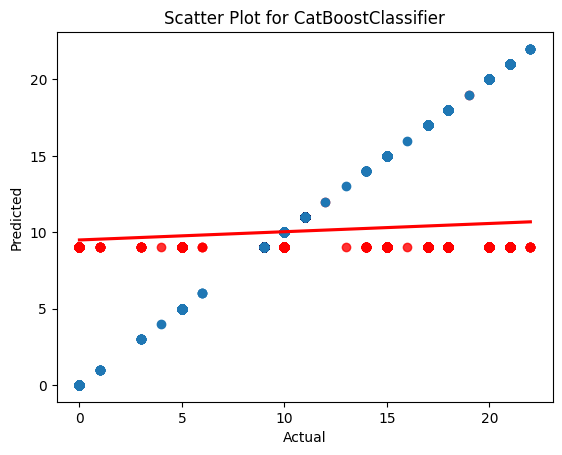



XGBClassifier
Model performance for Training set
- Accuracy Score: 1.0000
- F1 Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 1.0000
- F1 Score: 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000


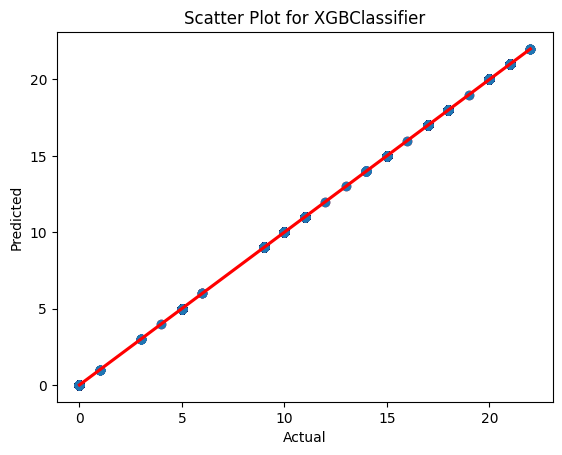

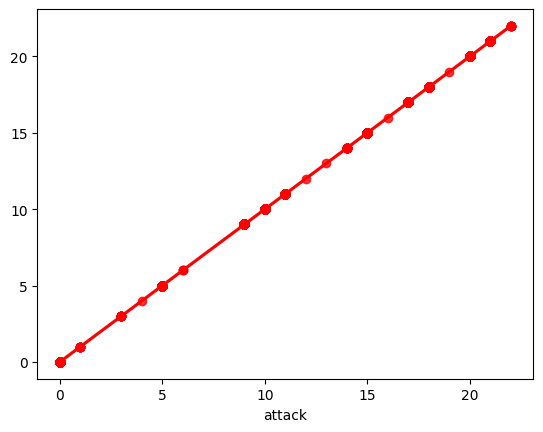

In [65]:
models = {
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(),
    "XGBClassifier": XGBClassifier()
}
model_list = []
acc_list = []

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are defined elsewhere in your code
# ... (rest of your code remains the same)

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_acc_score, model_train_f1, model_train_prec_score, model_train_rec_score = evaluate_model(
        y_train, y_train_pred
    )

    model_test_acc_score, model_test_f1, model_test_prec_score, model_test_rec_score = evaluate_model(
        y_test, y_test_pred
    )

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Accuracy Score: {:.4f}".format(model_train_acc_score))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_prec_score))
    print("- Recall Score: {:.4f}".format(model_train_rec_score))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Accuracy Score: {:.4f}".format(model_test_acc_score))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_prec_score))
    print("- Recall Score: {:.4f}".format(model_test_rec_score))
    acc_list.append(model_test_acc_score)

    print("=" * 35)
    # Plot within the loop using y_test_pred
    plt.scatter(y_test, y_test_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(
        f"Scatter Plot for {list(models.keys())[i]}"
    )  # Add title for clarity
    plt.show()  # Display the plot for each model

    sns.regplot(x=y_test, y=y_test_pred, ci=None, color="red") # Assuming y_pred should be y_test_pred here

    print("\n")

Results

In [66]:
pd.DataFrame(list(zip(model_list, acc_list)), columns=['Model Name', 'Accuracy Score']).sort_values(by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
6,CatBoostClassifier,1.000000
7,XGBClassifier,1.000000
3,DecisionTreeClassifier,0.999881
4,RandomForestClassifier,0.999405
1,SVC,0.999047
0,LogisticRegression,0.998849
2,KNeighborsClassifier,0.998770
5,AdaBoostClassifier,0.859377


from matplotlib import pyplot as plt
_df_0['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Accuracy Score', y='Model Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)